In [1]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import warnings
import os

In [2]:
warnings.filterwarnings('ignore')

In [3]:
os.chdir("D:\Datascience\MeriSkill projects\Project 2 - Diabetes Analysis")

In [4]:
data = pd.read_csv("diabetes.csv")

In [5]:
#Shallow copy
df = data.copy()
df1 = data.copy()

In [6]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
data.shape

(768, 9)

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.describe(include = 'all').style.background_gradient(cmap = "cividis")

In [12]:
(data.describe().T).style.background_gradient(cmap="coolwarm")

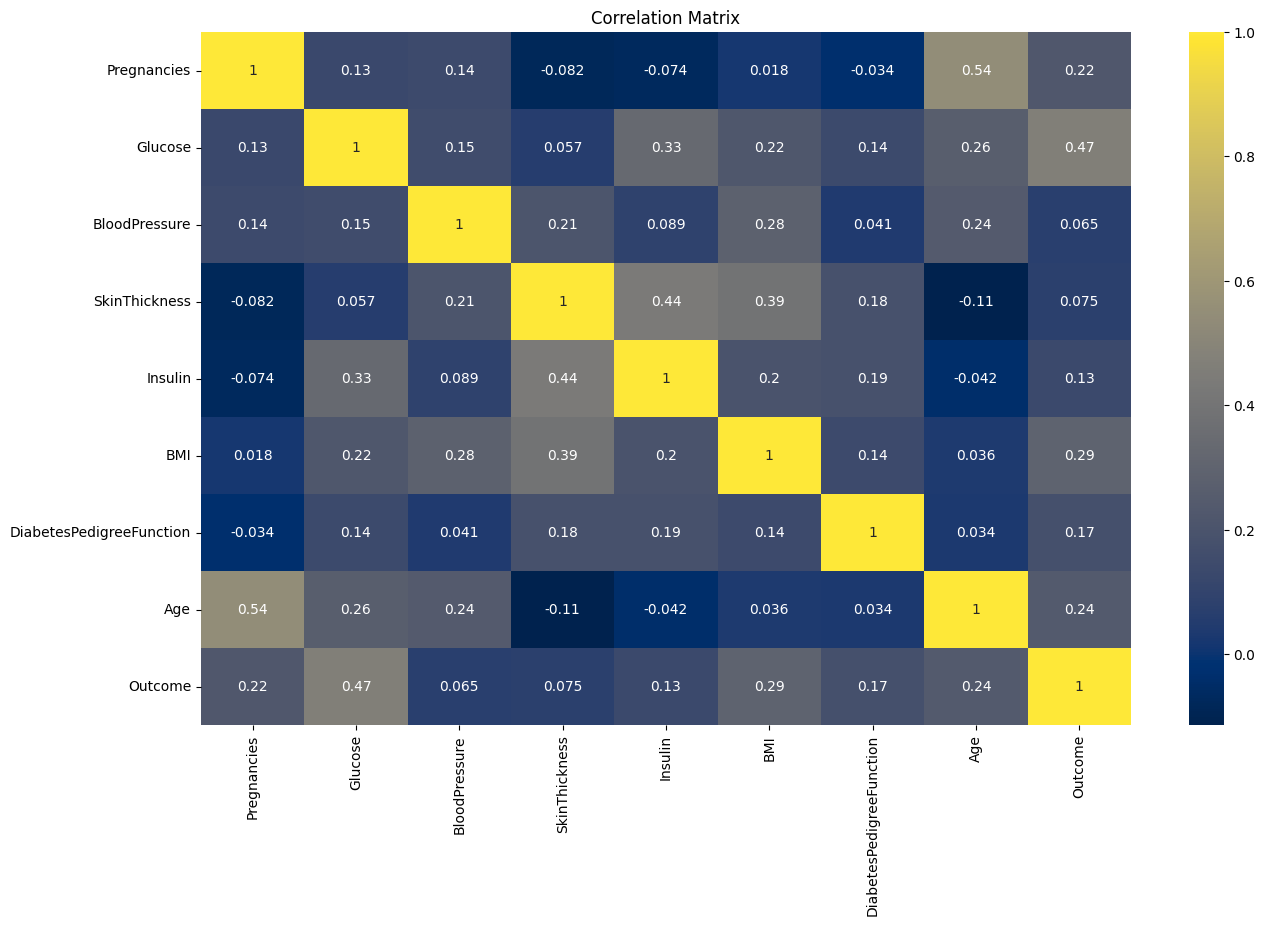

In [13]:
#Calculating and visualizing the correlation matrix using Heatmap.
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),annot = True, cmap = 'cividis')
plt.title('Correlation Matrix')
plt.show()

# **Data Visualisation**

<Axes: xlabel='Outcome', ylabel='count'>

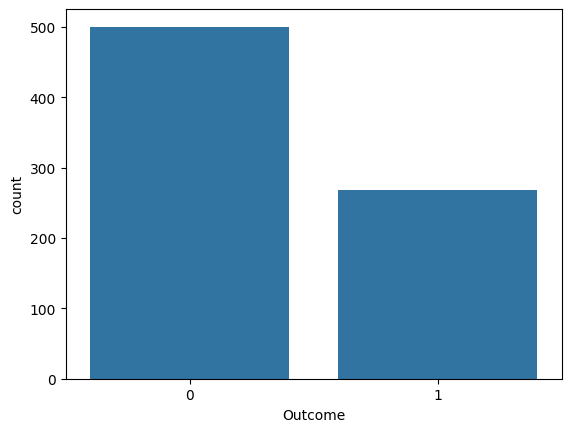

In [14]:
# checking the outcome
sns.countplot(x = 'Outcome', data = data)

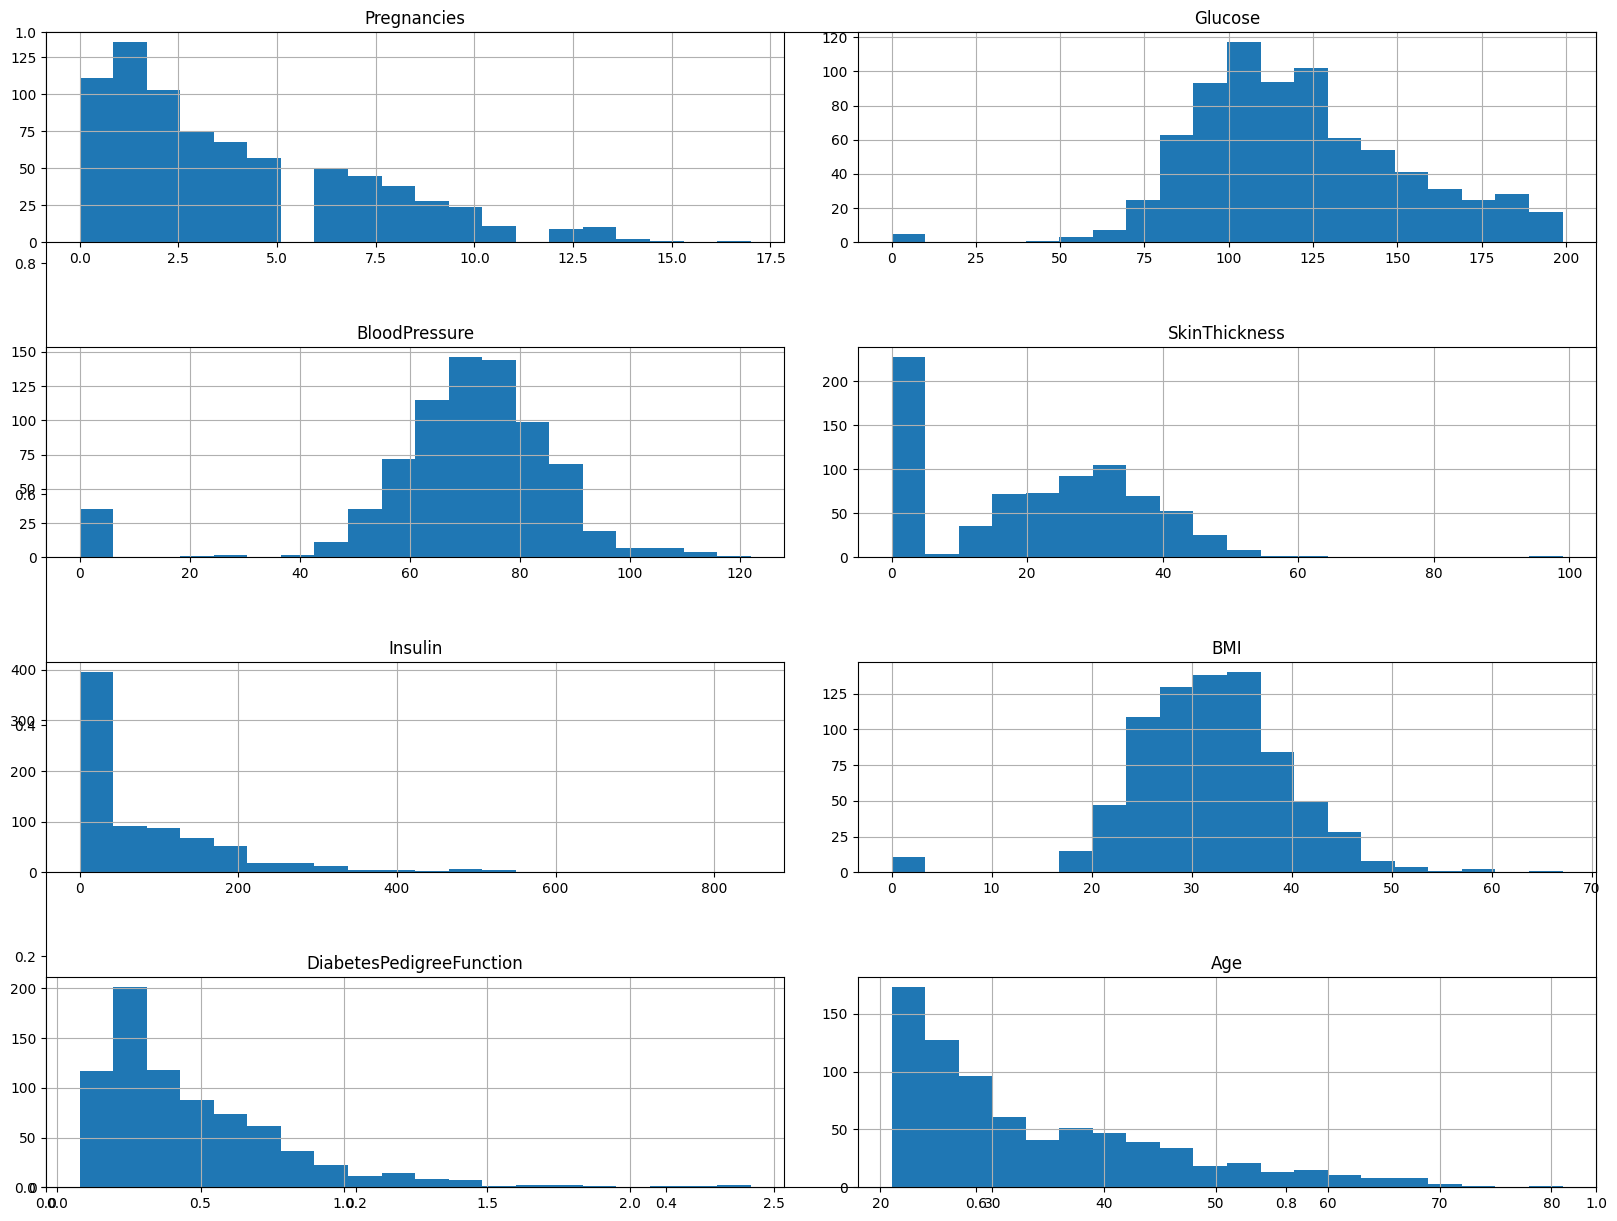

In [15]:
# Histogram of each feature.
import itertools

col = data.columns[:8]
plt.subplots(figsize = (20,15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(int((length/2)), 2, j + 1)
    plt.subplots_adjust(wspace = 0.1, hspace = 0.5)
    data[i].hist(bins = 20)
    plt.title(i)
plt.show()

<Figure size 2000x1000 with 0 Axes>

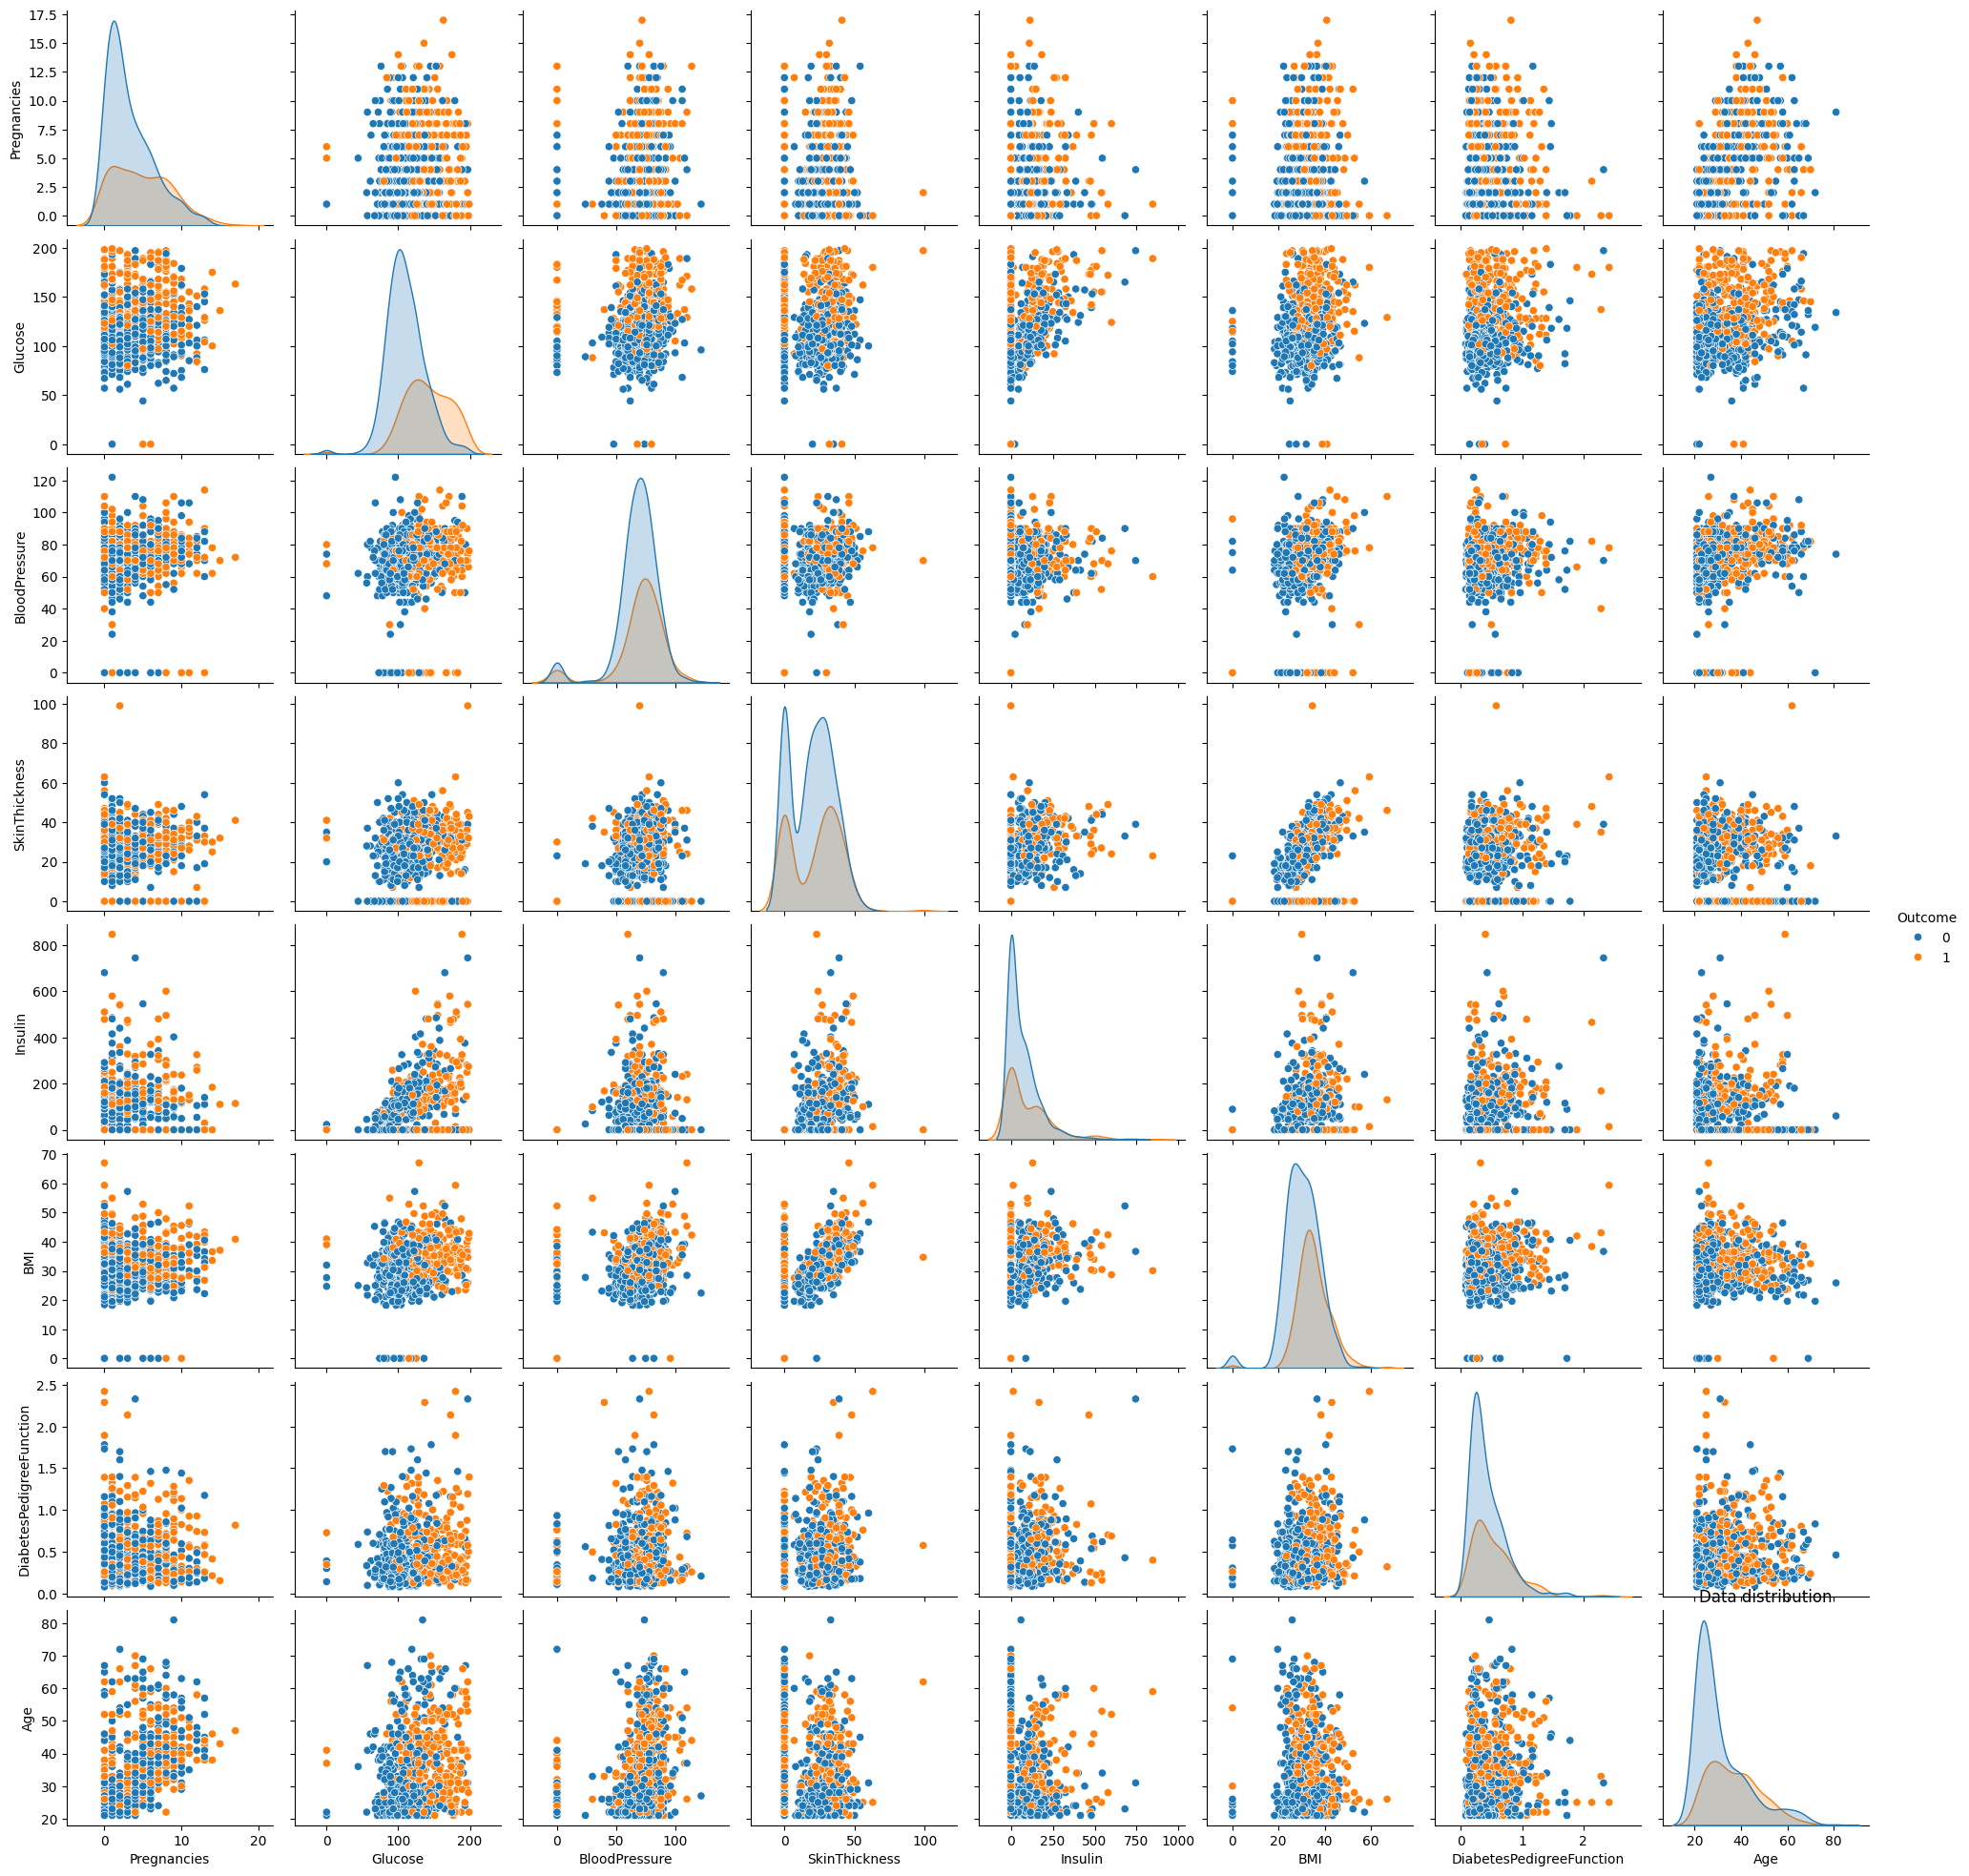

In [16]:
# Data distribution
plt.figure(figsize=(20,10))
sns.pairplot(data, hue = 'Outcome')
plt.title('Data distribution')
plt.show()

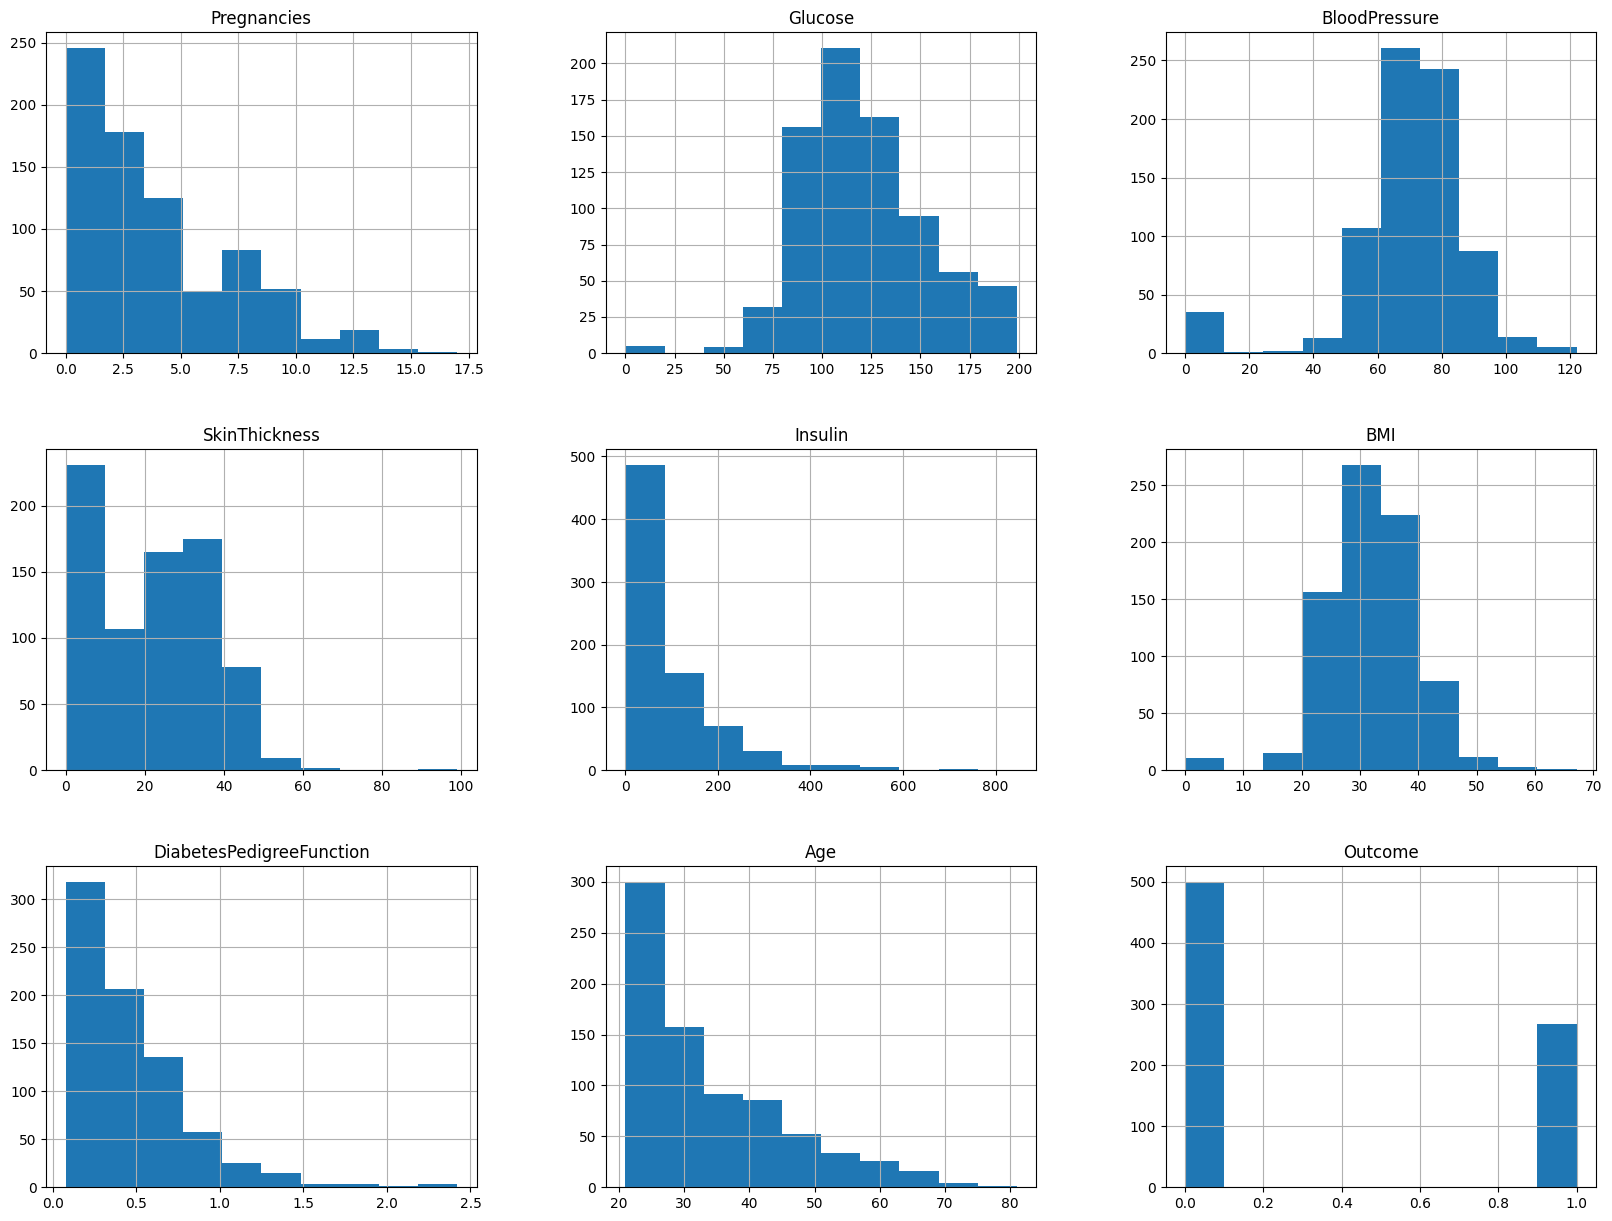

In [17]:
p = data.hist(figsize = (20,15))

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

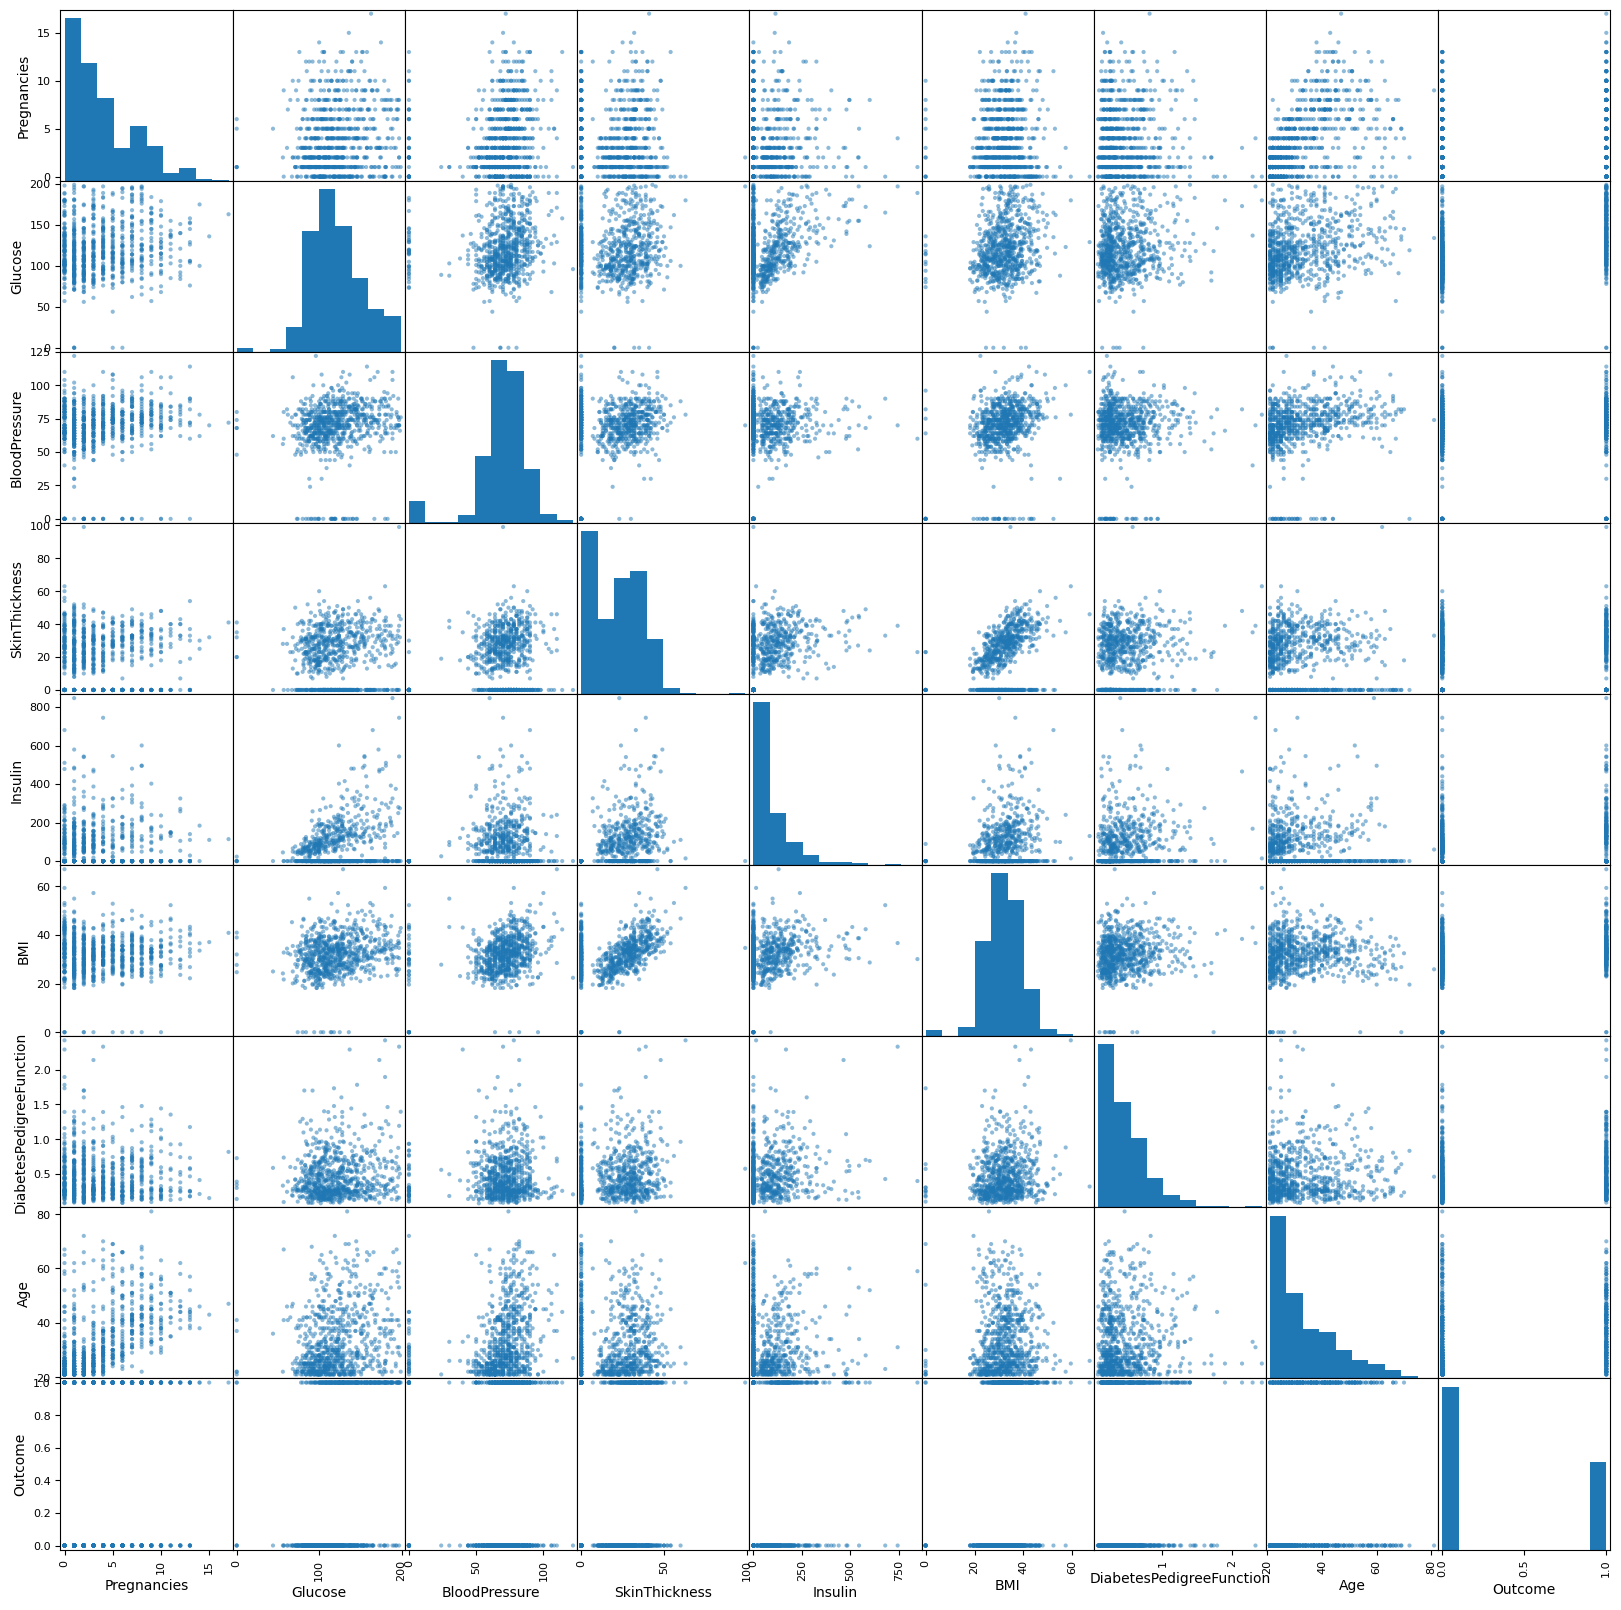

In [18]:
#Scatter plot Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(20,20))

In [19]:
# Measuring the BMI category using BMI value.
def bmi_measure(value):
    if value < 18.5:
        return 'under weight'
    elif value >= 18.5 and value <= 24.9:
        return 'Healthy'
    elif value >= 25 and value > 29.9:
        return 'Over weight'
    else:
        return 'Obese'

# Creating a column to visualize BMI
df1['BMI_measure'] = data['BMI'].apply(bmi_measure)

df1.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  BMI_measure  
0                     0.627   50        1  Over weight  
1                     0.351   31        0        Obese  
2                     0.672   32        1      Healthy  
3                     0.167   21        0        Obese  
4                     2.288   33        1  Over weight

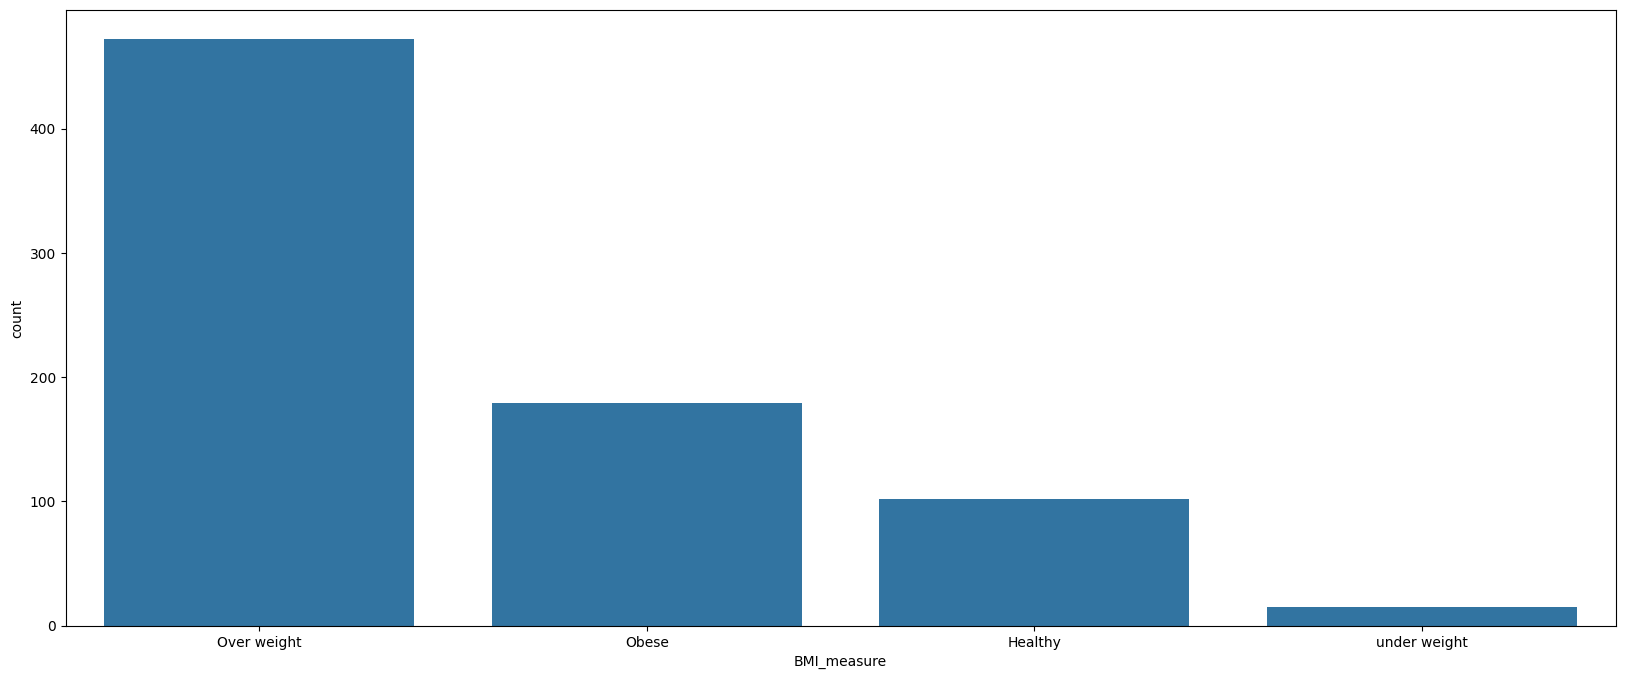

In [20]:
# checking BMI 
plt.figure(figsize=(20,8))
sns.countplot(x = 'BMI_measure', data = df1)
plt.show()

In [21]:
# Adding Diabetes result as a new column for Vizualisation.
def result(res):
    if res == 1:
        return 'Positive'
    else:
        return 'Negative'

df1['Diabetes Result'] = data['Outcome'].apply(result)
df1.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome   BMI_measure Diabetes Result  
0                     0.627   50        1   Over weight        Positive  
1                     0.351   31        0         Obese        Negative  
2                     0.672   32        1       Healthy        Positive  
3                     0.167   21        0         Obese        Negative  
4                     2.288   33        1   Over weight        Positive  
5                     0.201   30        0         Obese        Negative  
6                     0.248   26        1   Over weight        Positive  
7                     0.134   29        0   Over weight        Negative  
8                     0.158   53        1   Over weight        Positive  
9                     0.232   54        1  under weight        Positive

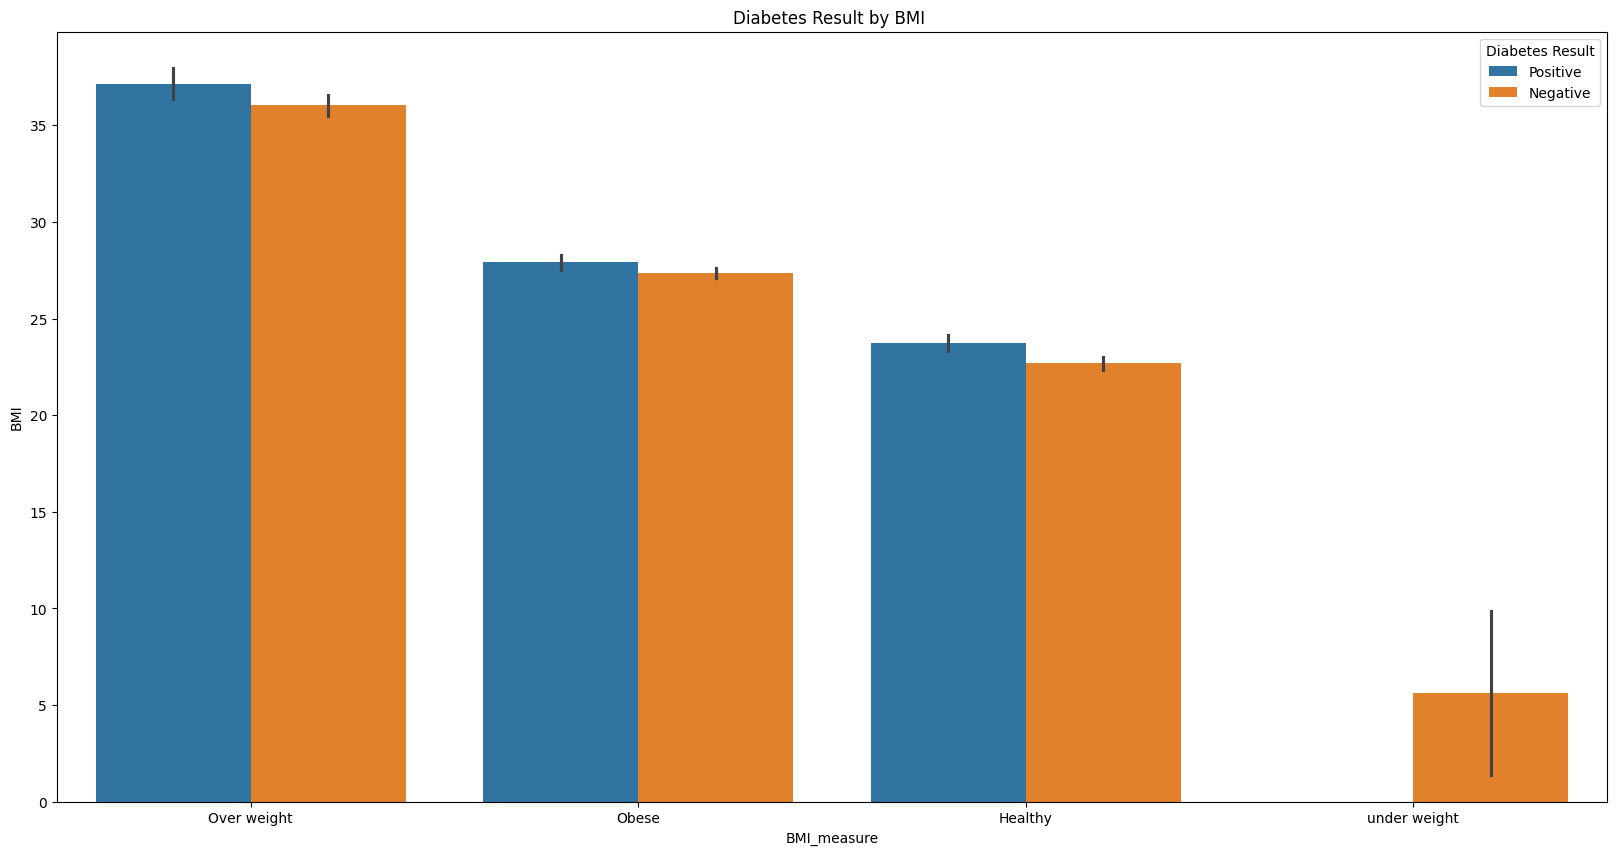

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'BMI_measure', y ='BMI' ,data = df1, hue= 'Diabetes Result')
plt.title('Diabetes Result by BMI ')
plt.show()

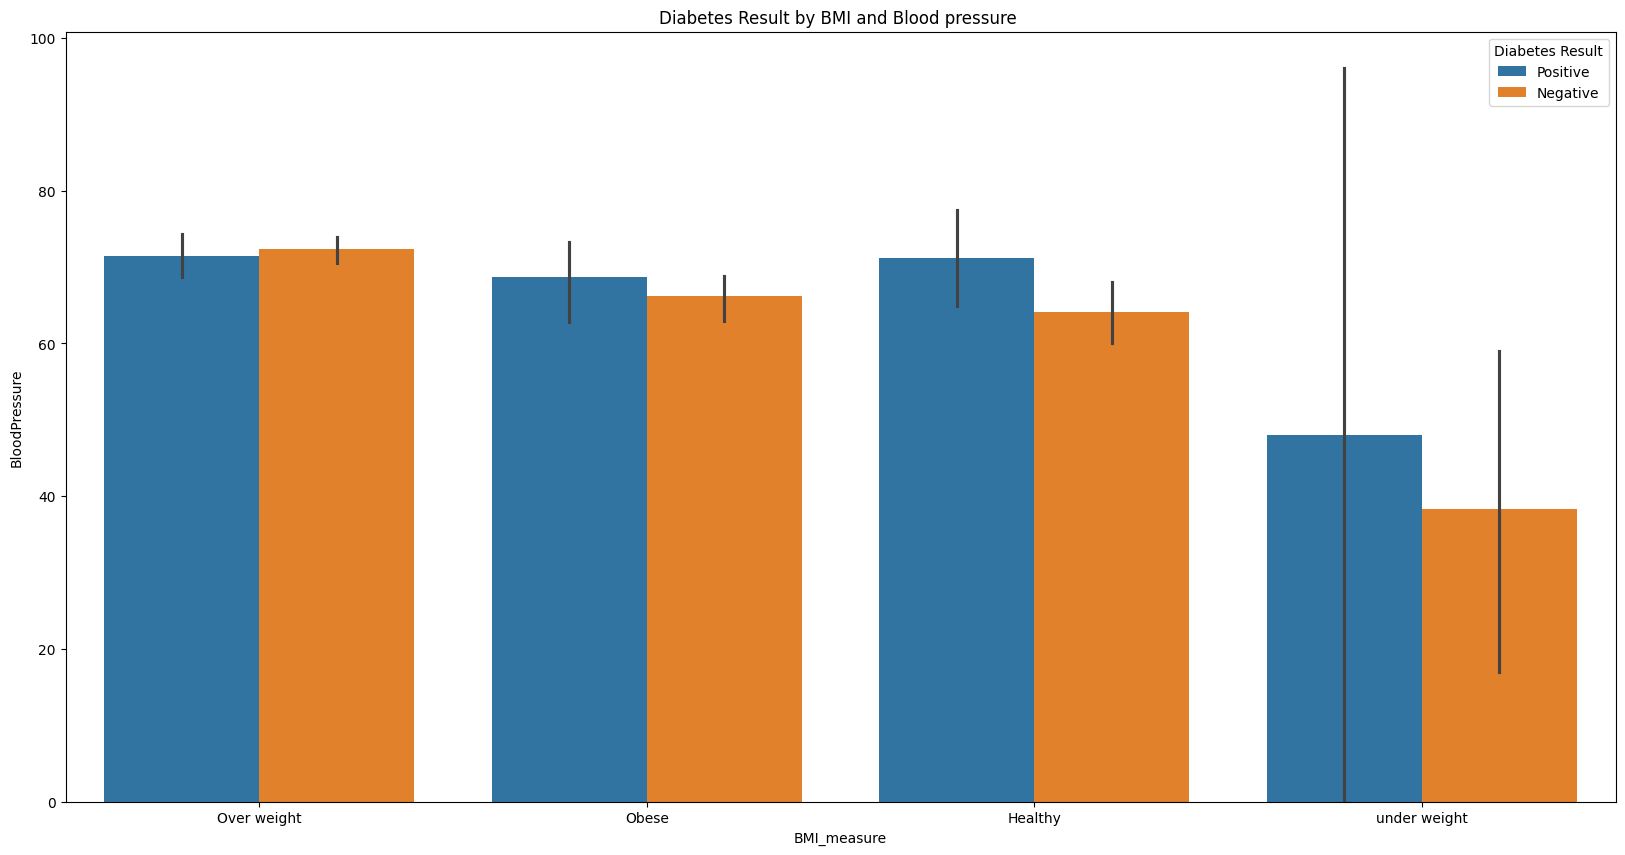

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'BMI_measure', y ='BloodPressure' ,data = df1, hue= 'Diabetes Result')
plt.title('Diabetes Result by BMI and Blood pressure ')
plt.show()

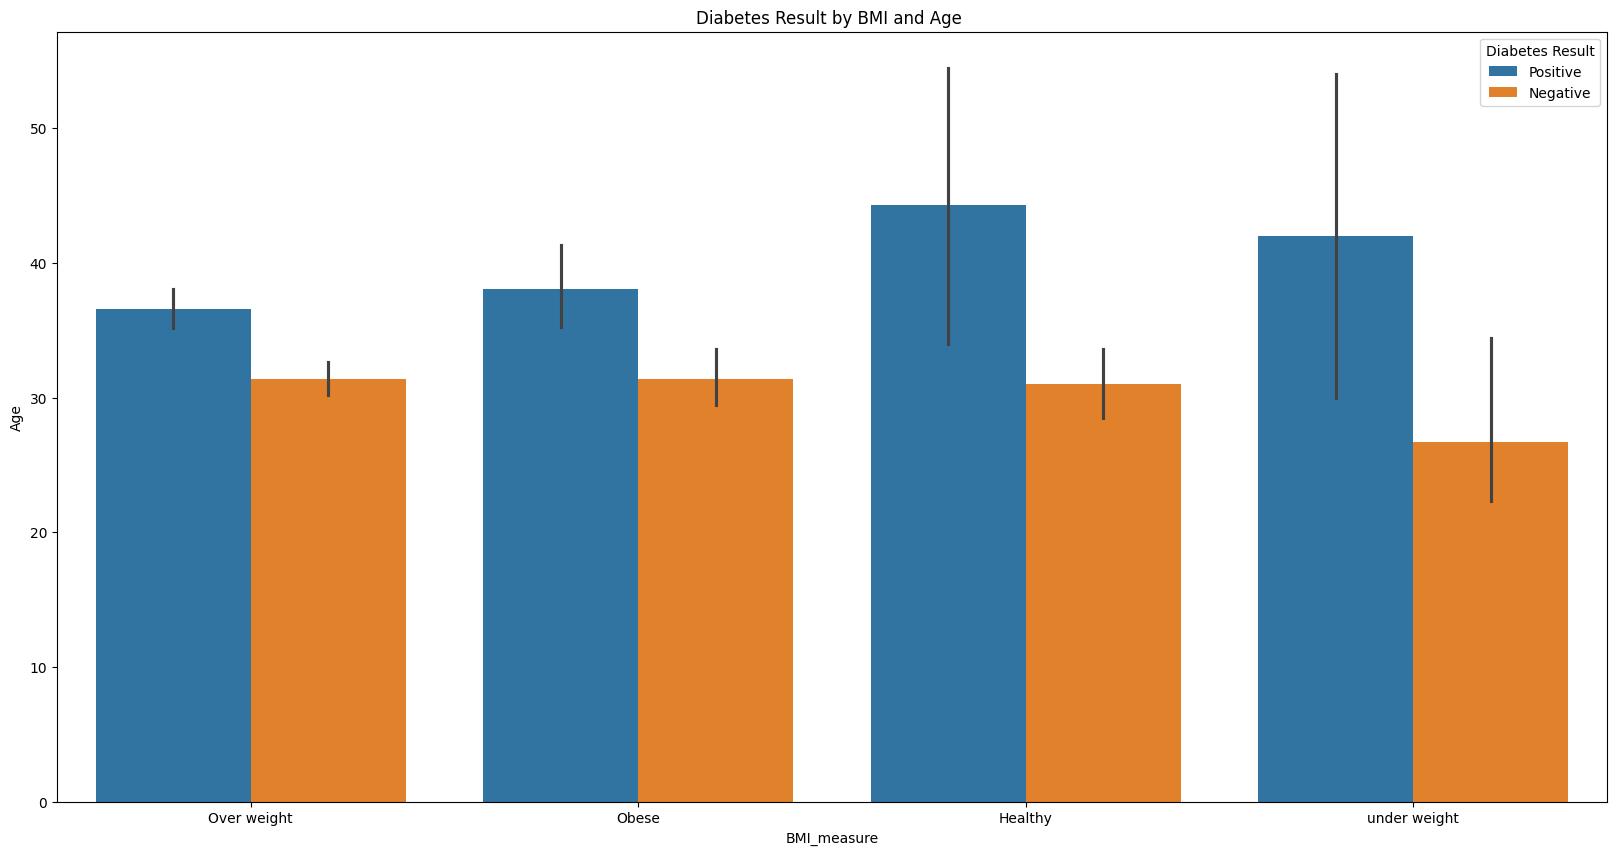

In [24]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'BMI_measure', y ='Age' ,data = df1, hue= 'Diabetes Result')
plt.title('Diabetes Result by BMI and Age ')
plt.show()

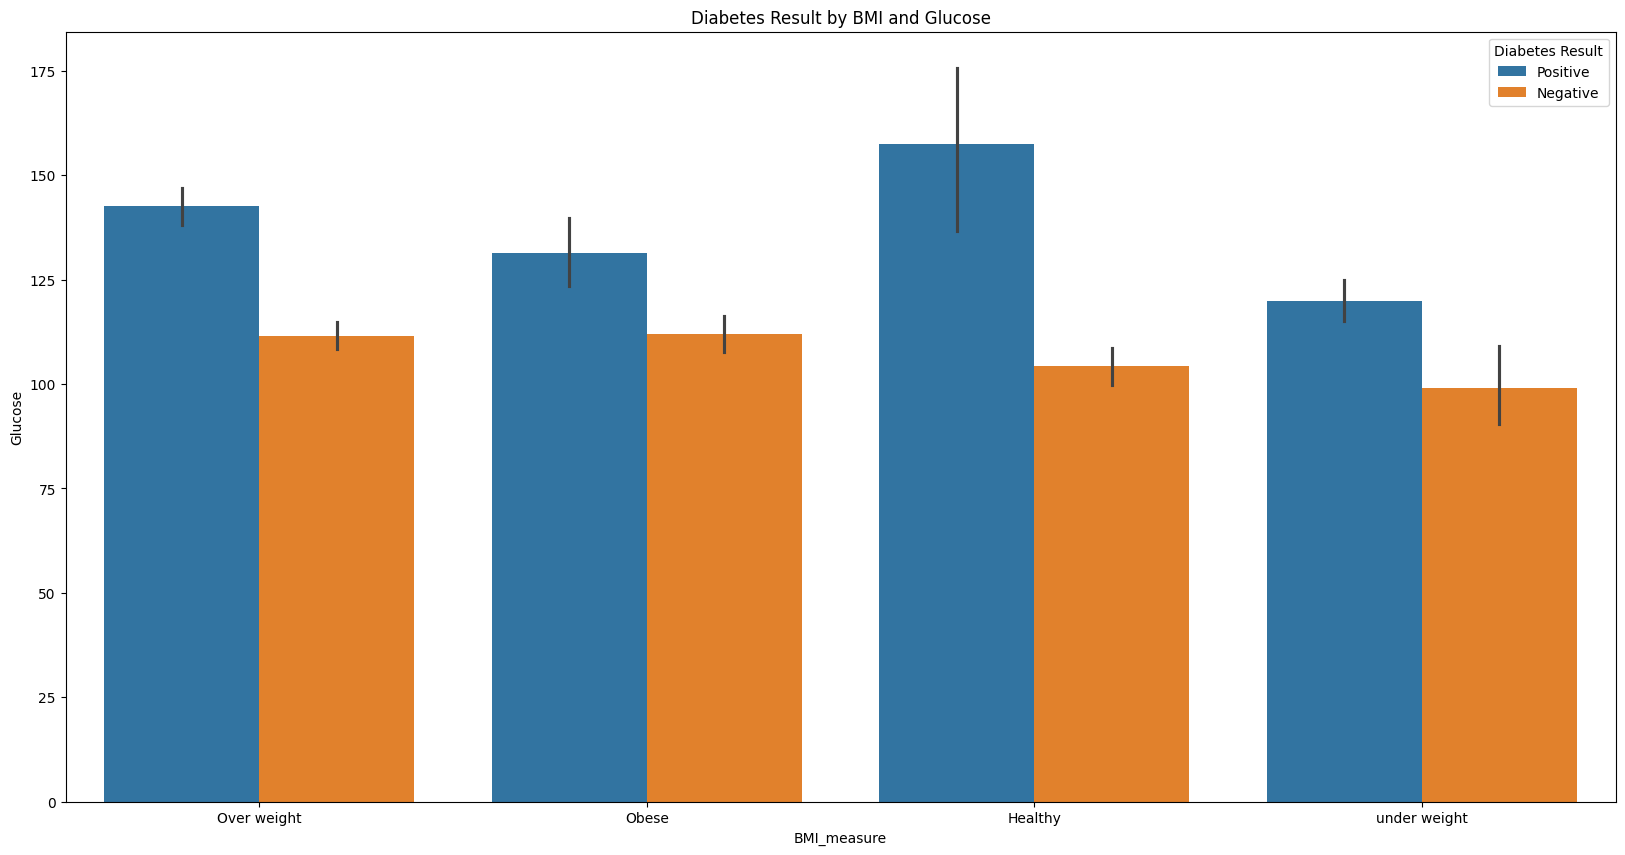

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'BMI_measure', y ='Glucose' ,data = df1, hue= 'Diabetes Result')
plt.title('Diabetes Result by BMI and Glucose')
plt.show()

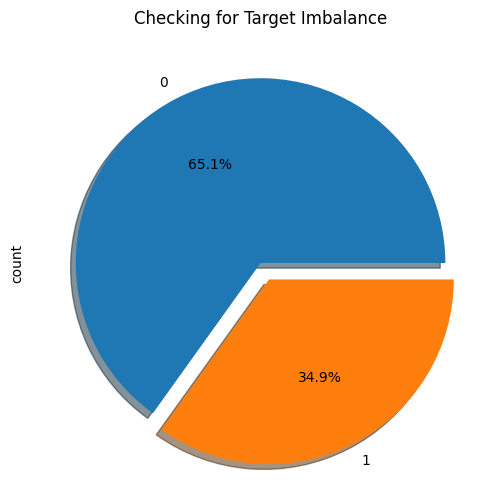

In [26]:
# Checking target Imbalance
plt.figure(figsize=(10,6))
data.Outcome.value_counts().plot.pie(explode=[0,0.1], autopct ='%1.1f%%', shadow = True)
plt.title('Checking for Target Imbalance')
plt.show()

- The target is well balanced

# **Data Cleaning**

In [27]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
#Checking null values percentage
print("==="*25)
print("Checking Data has null values or not")
print("==="*25)
print(round(data.isnull().sum() * 100 / len(data),2))

Checking Data has null values or not
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [29]:
(data==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

<Axes: >

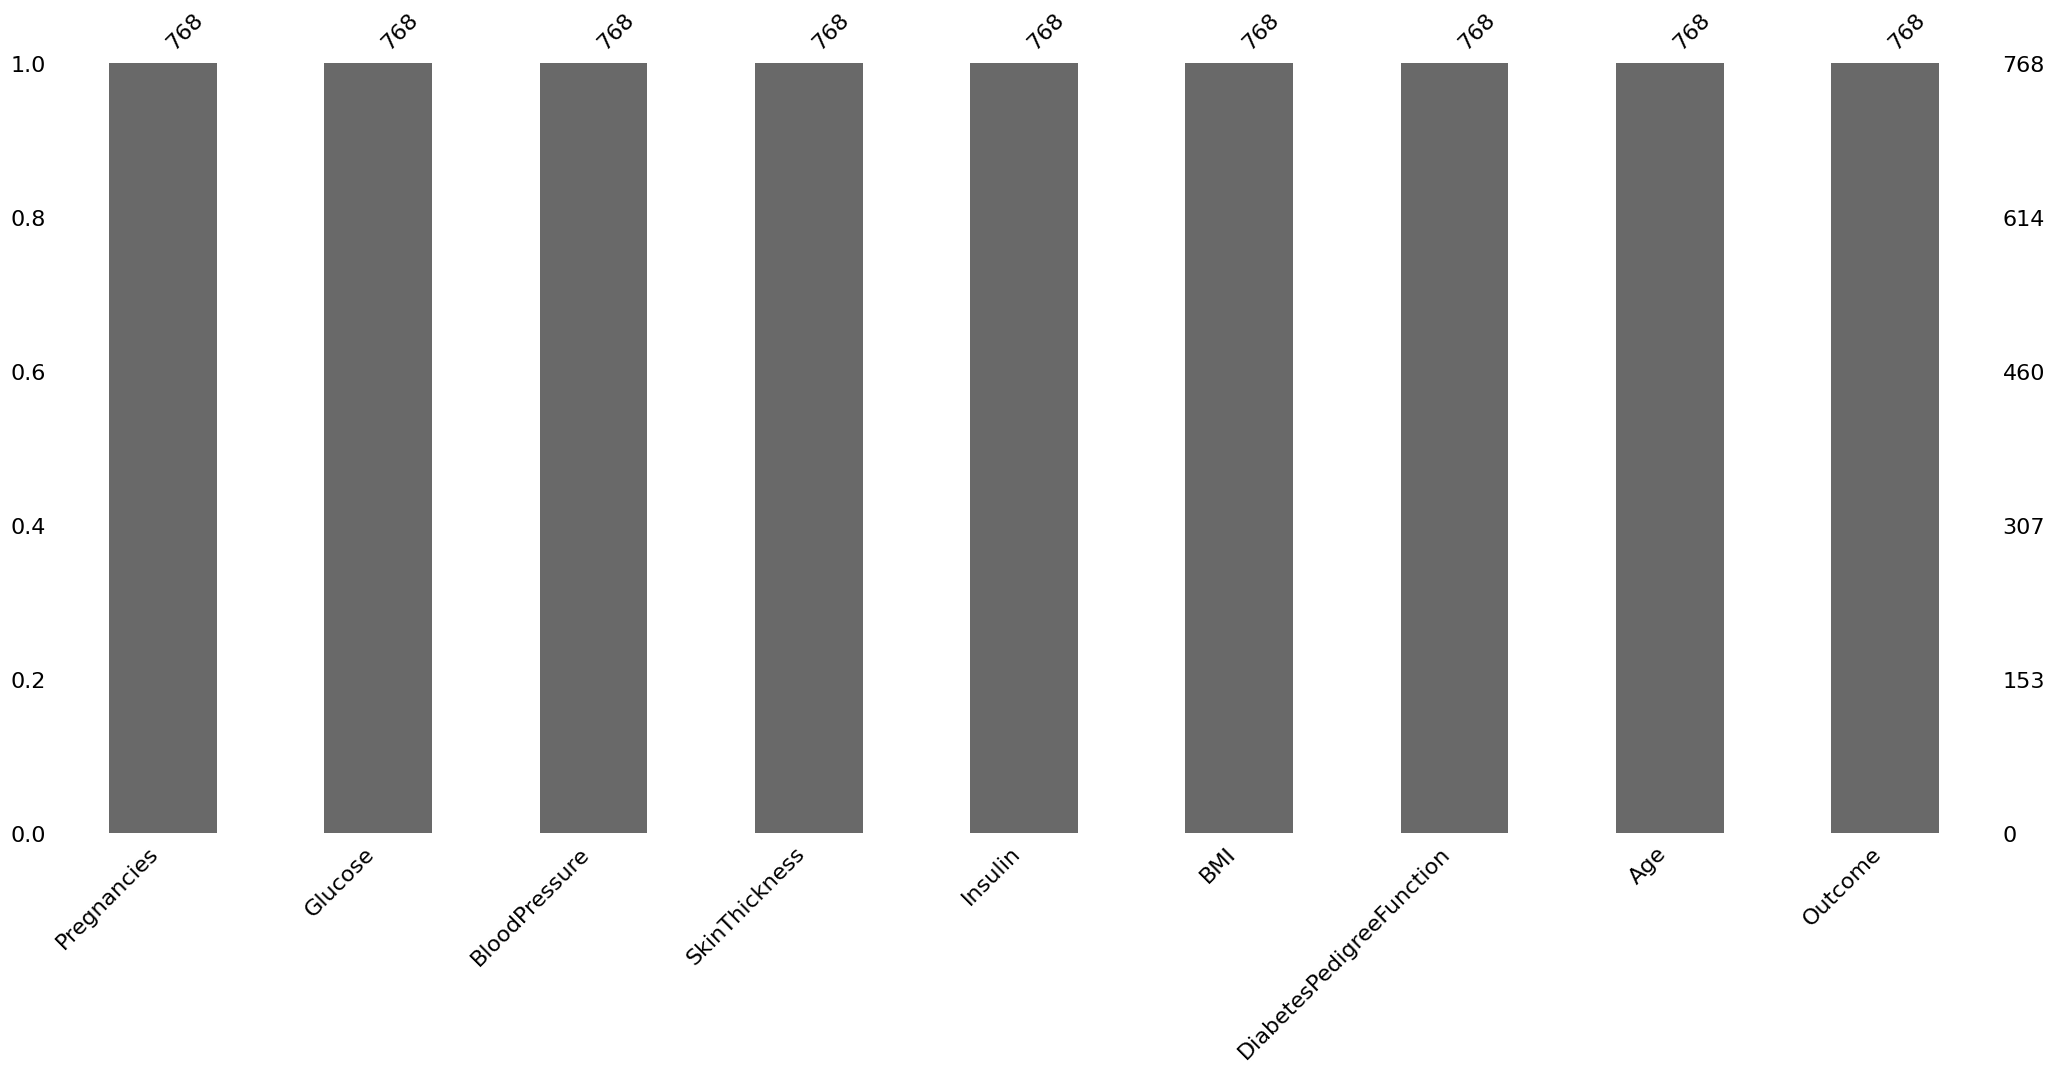

In [30]:
mno.bar(data)

- The plot shows that there is no missing values

# **Outlier Detection**

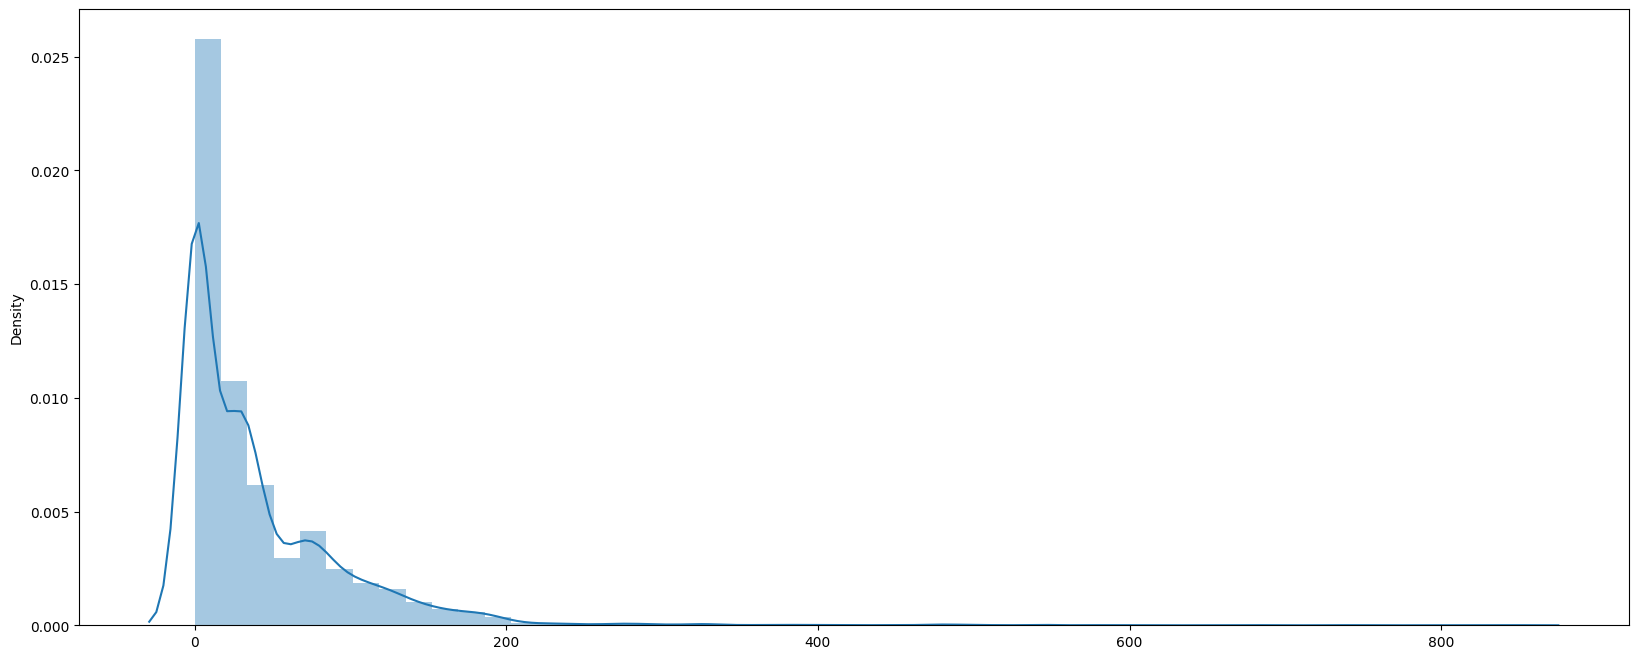

In [31]:
# checking for outlier
plt.figure(figsize=(20,8))
sns.distplot(data)
plt.show()

<Axes: >

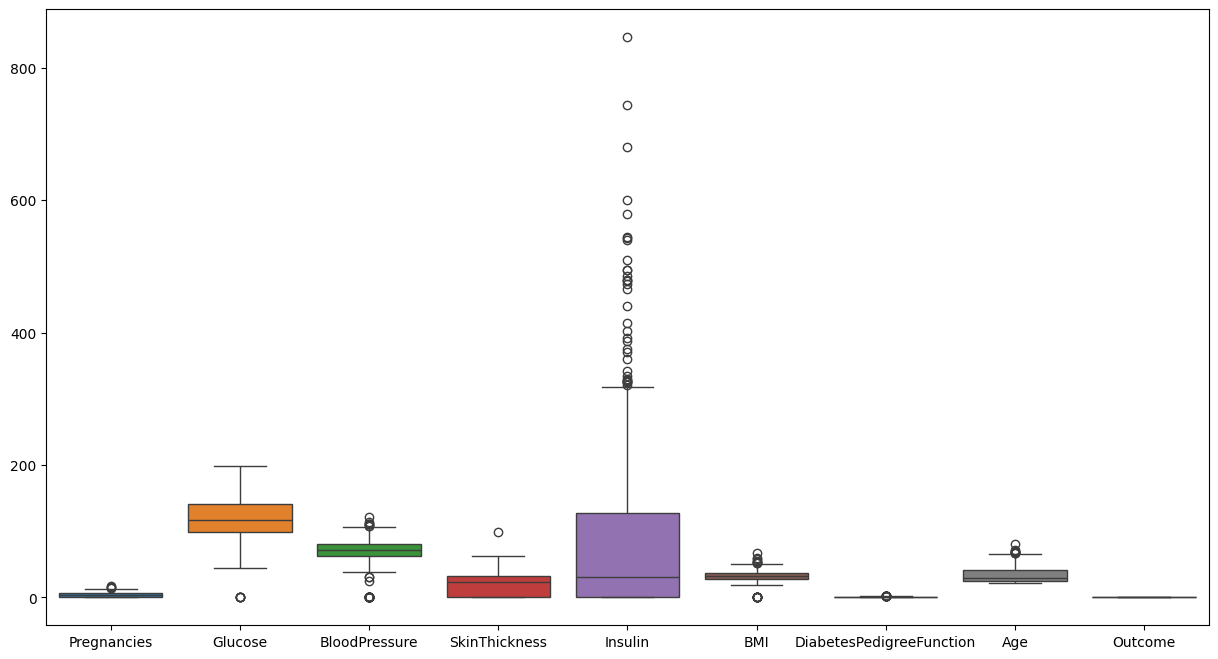

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(data)

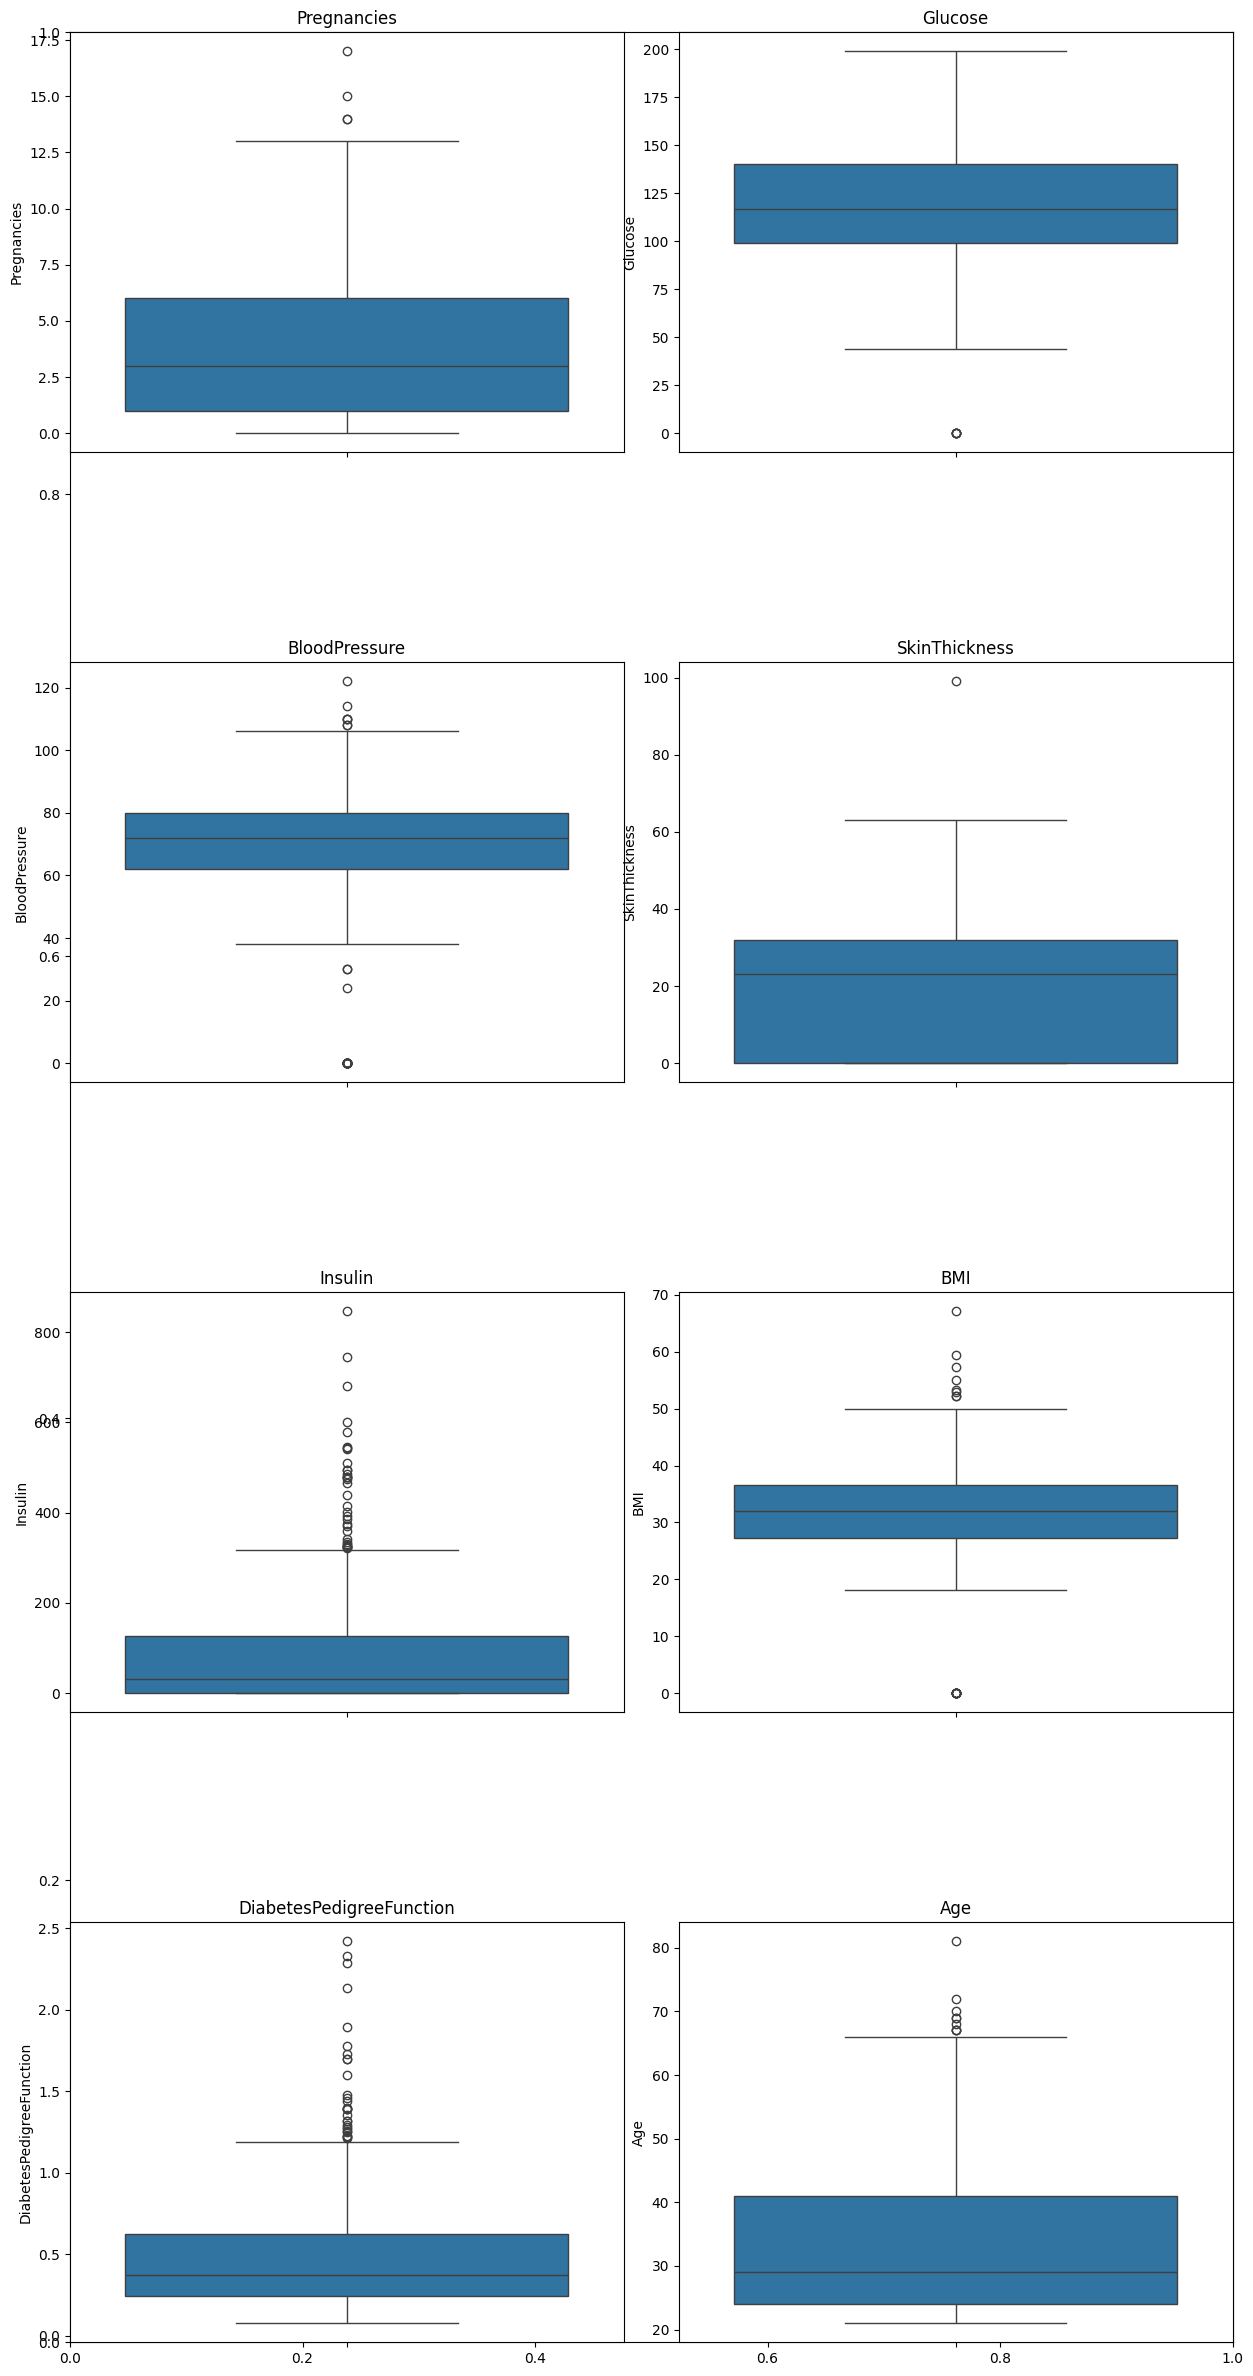

In [33]:
# Checking each features for outliers.
col = data.columns[:8]
plt.subplots(figsize = (15,30))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(int((length/2)), 2, j + 1)
    plt.subplots_adjust(wspace = 0.1, hspace = 0.5)
    sns.boxplot(data[i])
    plt.title(i)
plt.show()

In [34]:
from matplotlib import rcParams

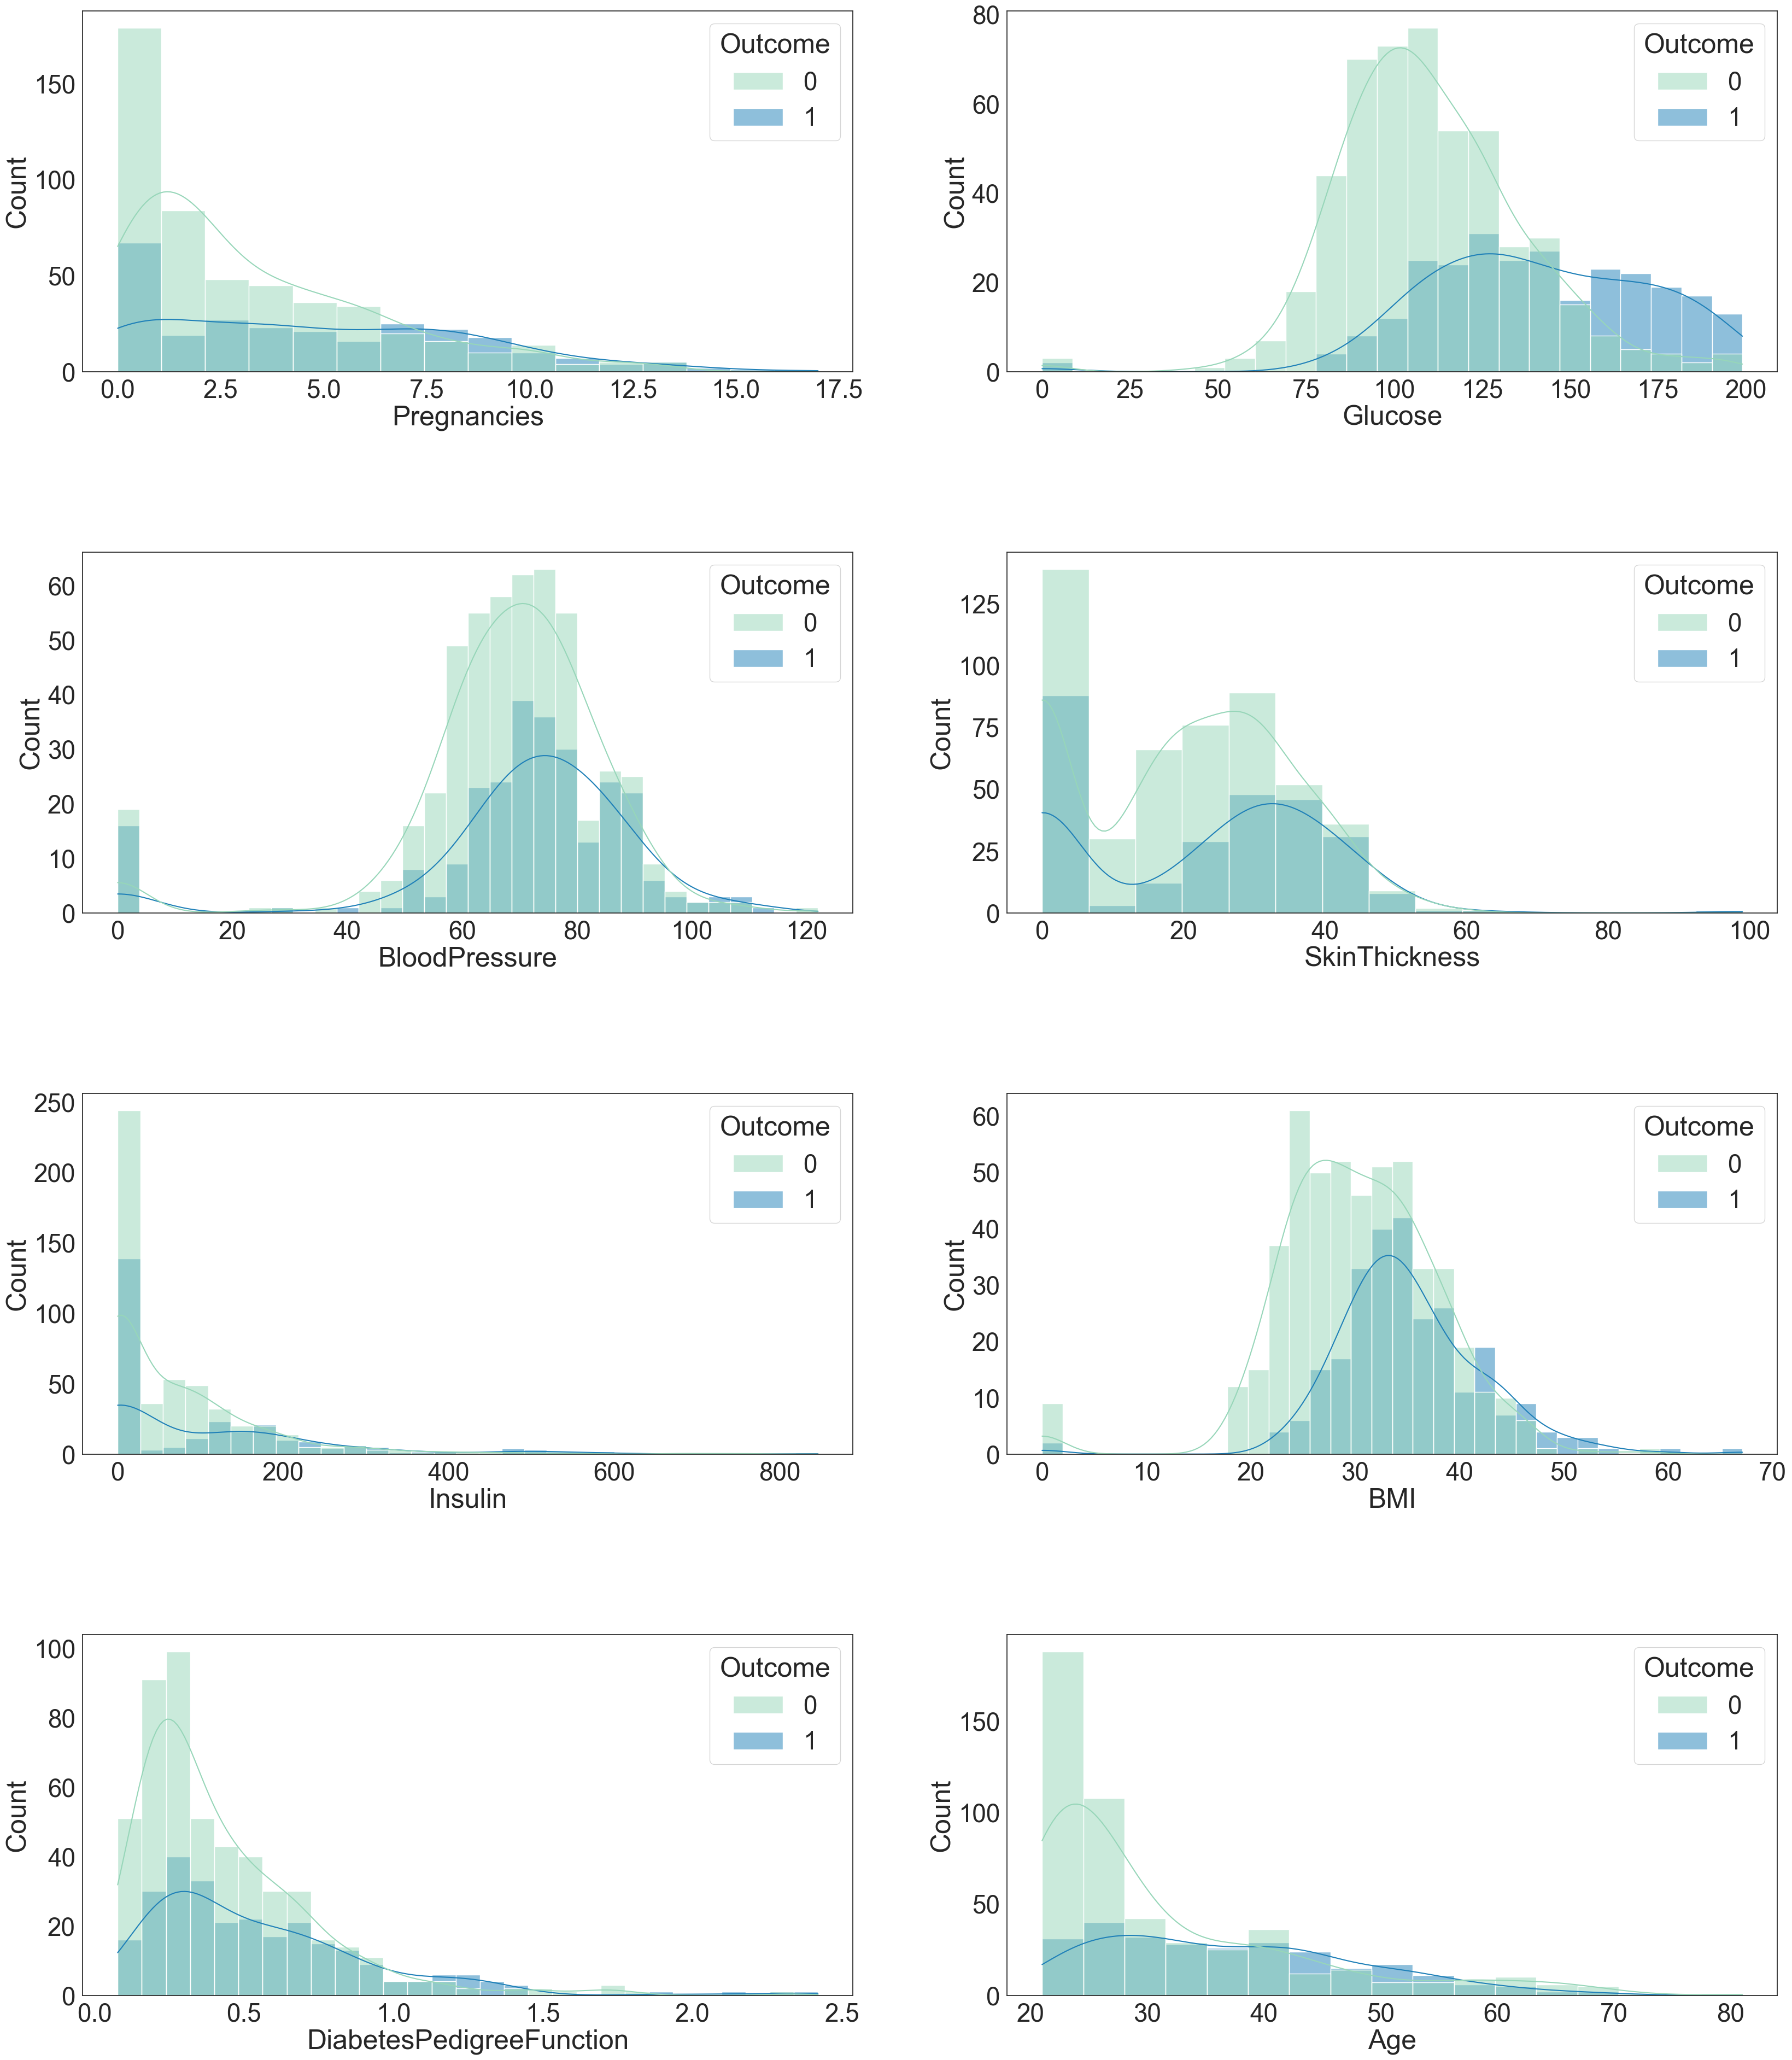

In [35]:
# checking and replacing the zero values to Mean value.
feature_names = [cname for cname in data.loc[:,:'Age'].columns]

rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for names in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data = data, x=names, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

**Looking at the pictures above, it would be good to change the zero value of each feature to another value. First, let's calculate the proportion of zero values in each feature.**

In [36]:
#Checking the Zero values of each features
zero_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = data['Glucose'].count()

for feature in zero_features:
    zero_count = data[data[feature]==0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Pregnancies 0 number of cases 111, percent is 14.45 %
Glucose 0 number of cases 5, percent is 0.65 %
BloodPressure 0 number of cases 35, percent is 4.56 %
SkinThickness 0 number of cases 227, percent is 29.56 %
Insulin 0 number of cases 374, percent is 48.70 %
BMI 0 number of cases 11, percent is 1.43 %


In [37]:
#Removing outliers
diabetes_mean = data[zero_features].mean()
data[zero_features]=data[zero_features].replace(0, diabetes_mean)

In [38]:
(data==0).sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# **Model Building**

In [39]:
# x,y split
x = data.drop(["Outcome"],axis = 1)
y = data['Outcome']

In [40]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 264)

In [41]:
# Model Building
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

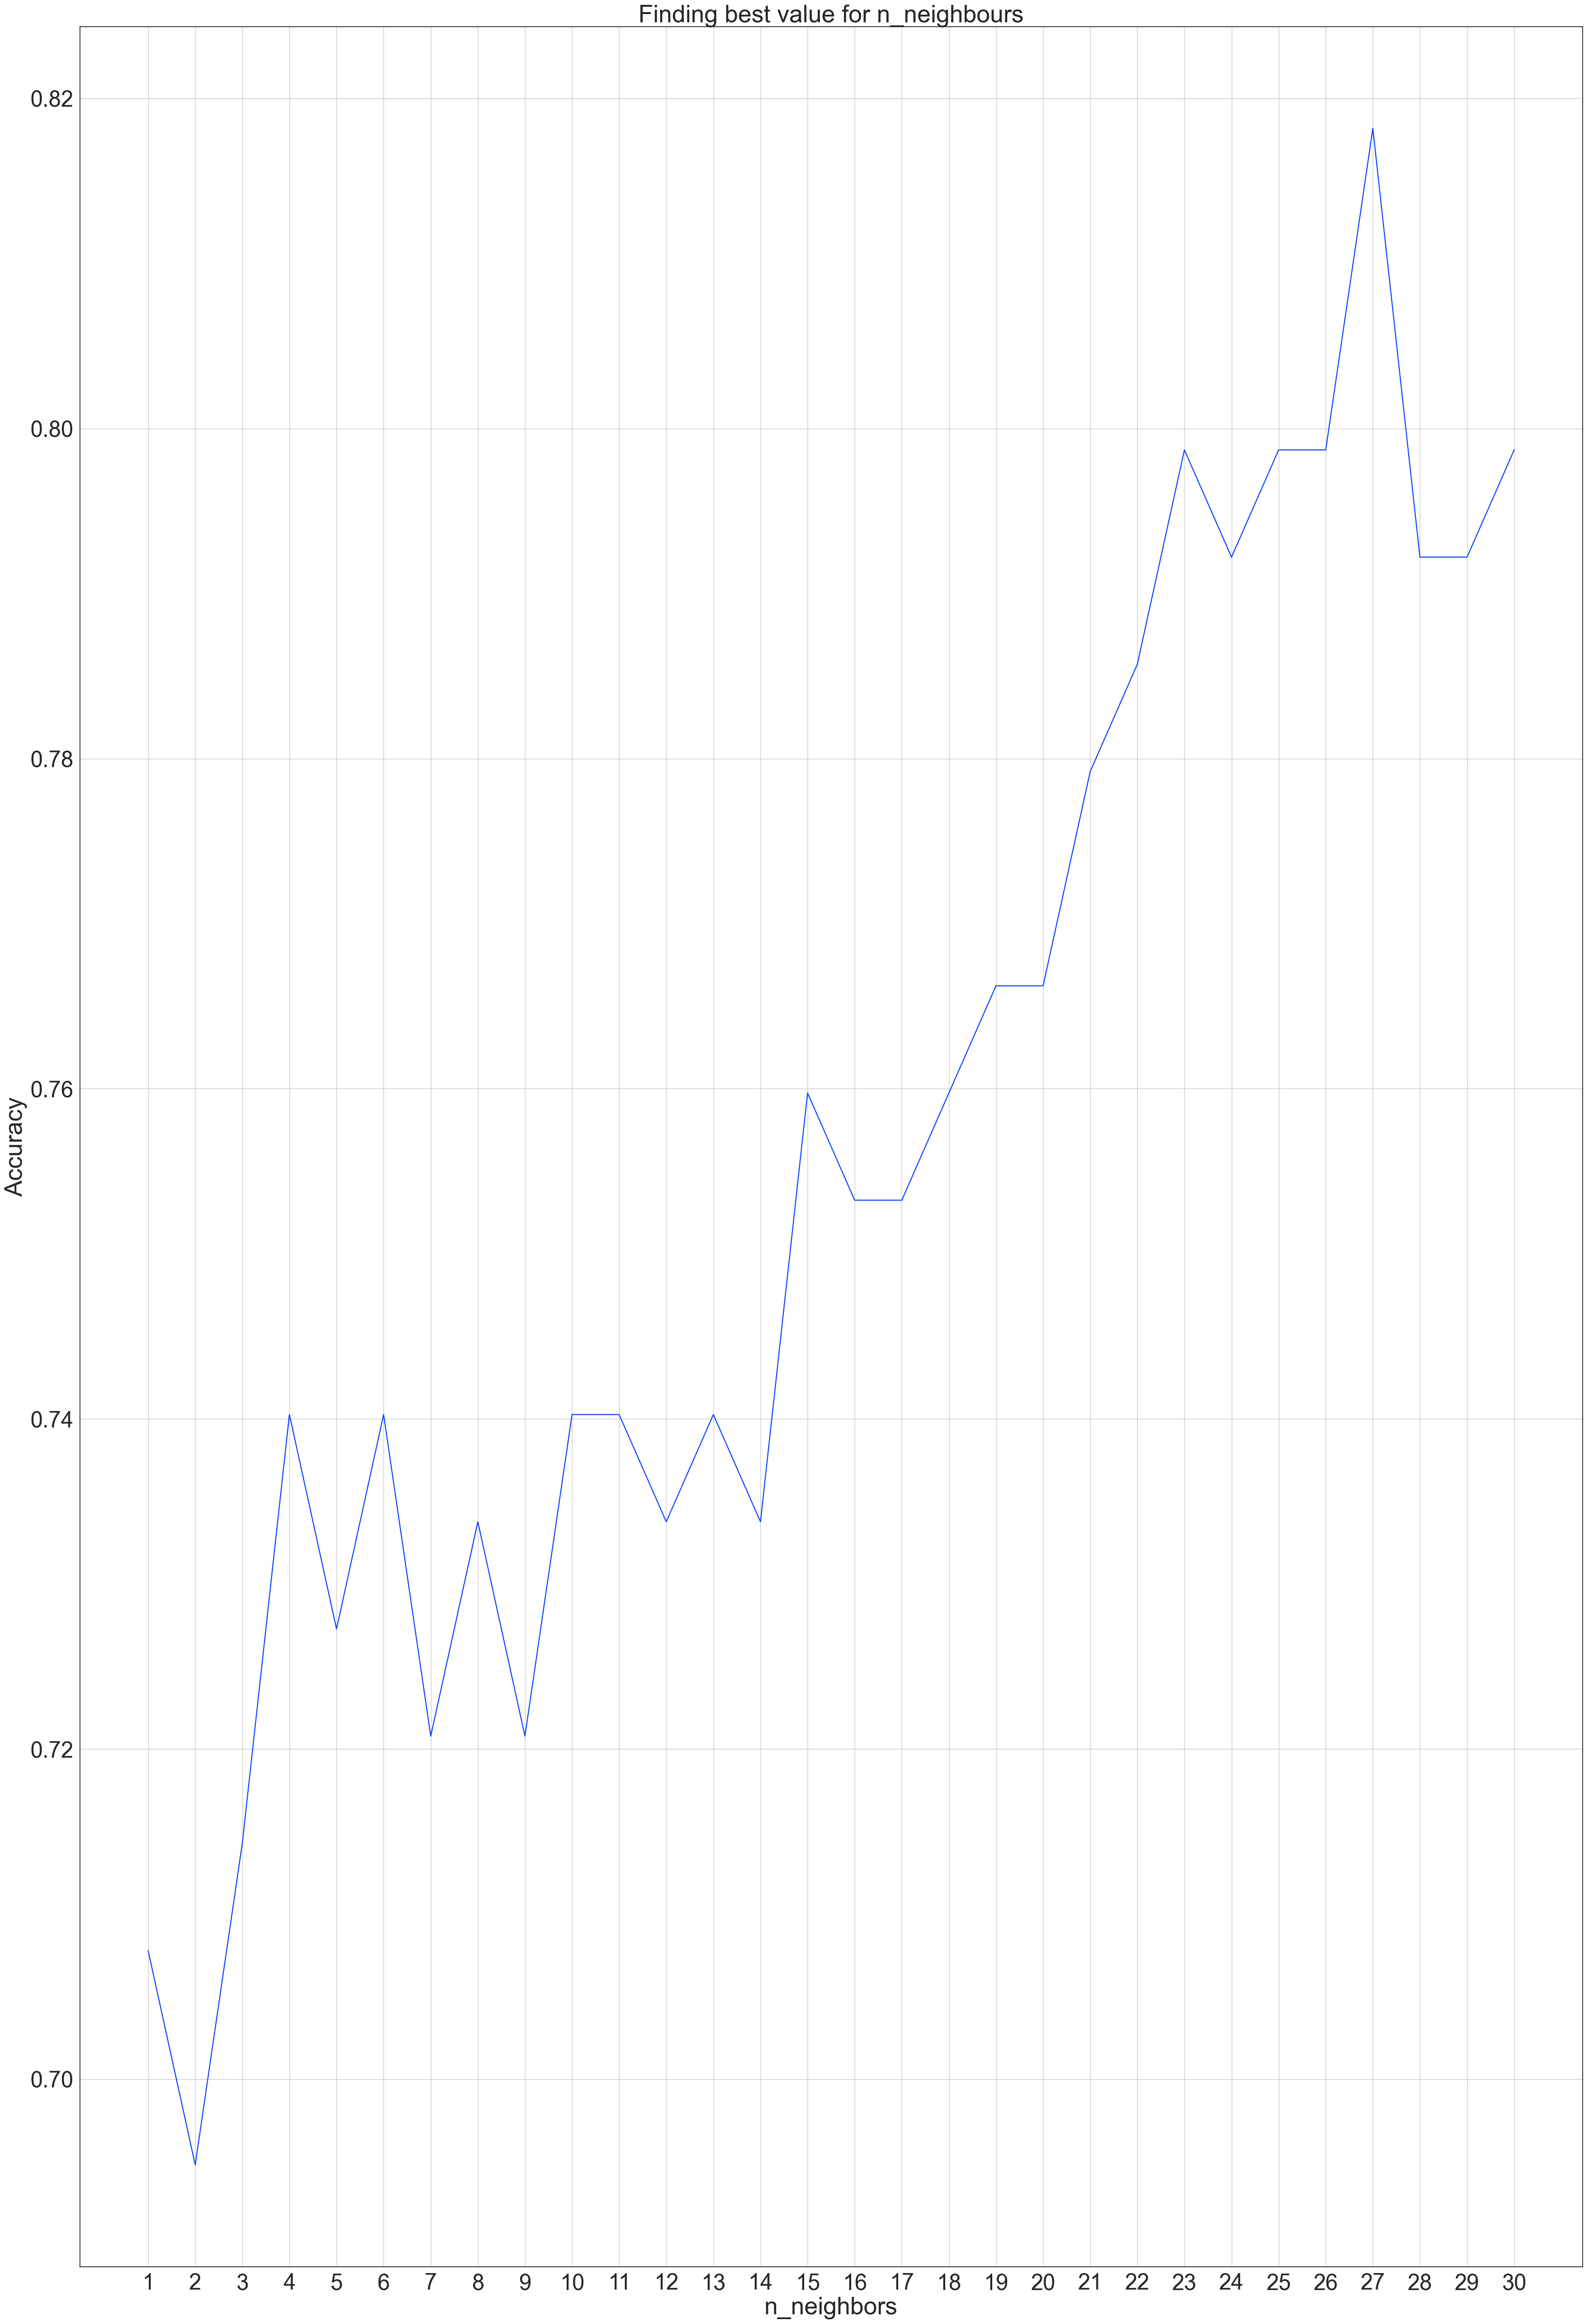

Highest value:  0.8181818181818182


In [44]:
#Finding best value for n_neighbours
x_axis = list(range(1, 31))
accuracy_values = [] # Use a list to store accuracy values

for i in x_axis:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    prediction = knn_model.predict(x_test)
    accuracy = accuracy_score(prediction, y_test)
    accuracy_values.append(accuracy)

acc = pd.Series(accuracy_values, index=x_axis) # Convert the list to a Pandas Series
plt.plot(x_axis, acc)
plt.xticks(x_axis)
plt.title("Finding best value for n_neighbours")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

print('Highest value: ', acc.max())

In [45]:
# K - nearest algorithm
knn = KNeighborsClassifier(n_neighbors = 27, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [46]:
y_pred = knn.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy:', (accuracy*100))

Accuracy: 81.81818181818183


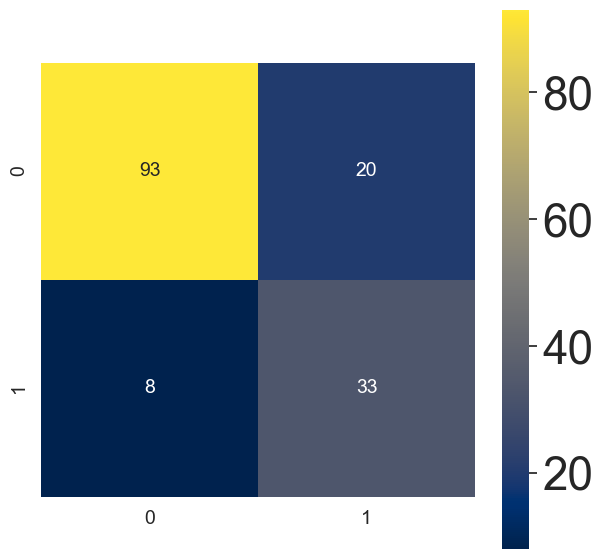

In [49]:
# Confusion Matrix
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot = True,fmt='d', cmap = 'cividis', square = True, annot_kws={'size': 14})
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [50]:
report = classification_report(y_pred,y_test)

In [51]:
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       113
           1       0.62      0.80      0.70        41

    accuracy                           0.82       154
   macro avg       0.77      0.81      0.79       154
weighted avg       0.84      0.82      0.82       154

